In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [234]:
data=pd.read_csv("titanictrain.csv")

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [237]:
data=shuffle(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S


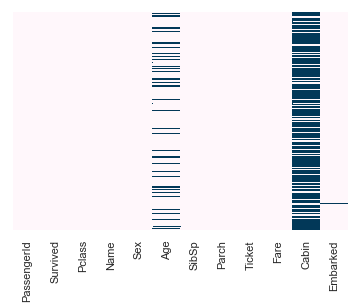

In [238]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

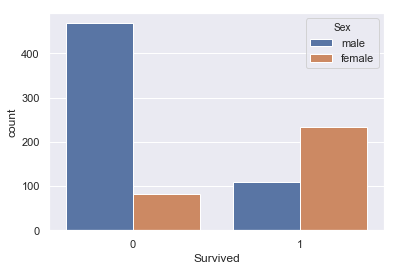

In [239]:
sns.countplot('Survived',data=data,hue='Sex')

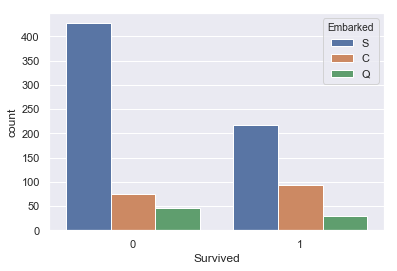

In [240]:
sns.countplot('Survived',data=data,hue='Embarked')

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 363 to 8
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 130.5+ KB


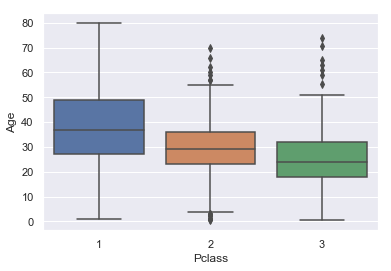

In [242]:
sns.boxplot('Pclass','Age',data=data)

In [243]:
def agecal(var):
    age=var[0]
    pclass=var[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        if pclass==2:
            return 30
        if pclass==3:
            return 25
    else:
        return age

In [244]:
data['Age']=data[['Age','Pclass']].apply(agecal,axis=1)

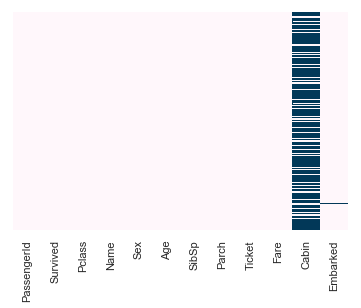

In [245]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [246]:
data.drop(['Name','Cabin','Ticket','Fare','Embarked','PassengerId'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
363,0,3,male,35.0,0,0
142,1,3,female,24.0,1,0
681,1,1,male,27.0,0,0
722,0,2,male,34.0,0,0
777,1,3,female,5.0,0,0


In [247]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'].astype('str'))
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
363,0,3,1,35.0,0,0
142,1,3,0,24.0,1,0
681,1,1,1,27.0,0,0
722,0,2,1,34.0,0,0
777,1,3,0,5.0,0,0


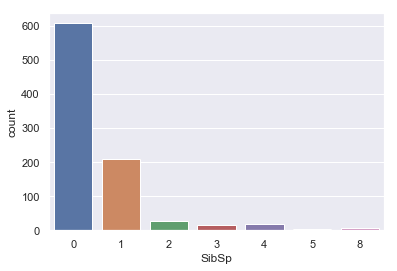

In [248]:
sns.countplot('SibSp',data=data)

In [249]:
data.dropna(inplace=True)

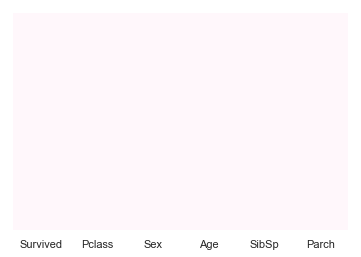

In [250]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='PuBu')

In [251]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [252]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=False)

In [253]:
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [254]:
print(classification_report(test_y,lr.predict(test_x)))

             precision    recall  f1-score   support

          0       0.81      0.89      0.85       103
          1       0.83      0.72      0.77        76

avg / total       0.82      0.82      0.82       179



In [255]:
print(confusion_matrix(test_y,lr.predict(test_x)))

[[92 11]
 [21 55]]


In [258]:
print(accuracy_score(test_y,lr.predict(test_x))*100)

82.12290502793296
